Trabalho 3

O estudo aqui proposto pode ser encontrado em https://github.com/ViniciusCMB/Metodos_Num.git


Bibliotecas

In [75]:
import numpy as np
import matplotlib.pyplot as plt

Função para resolver o problema

In [76]:
def func_C(Lx, Nx, T, Nt, alpha, u, CE):
    dx = Lx / Nx
    dt = T / Nt

    # Verificar a restrição do passo de tempo
    if dt > 1 / (((2 * alpha) / (dx**2)) + (u / dx)):
        raise ValueError(
            "O passo de tempo não satisfaz a condição de estabilidade.")

    # Inicializar a matriz de concentração
    C = np.zeros((Nt, Nx))

    # Condição inicial
    C[0, :] = 0.0

    # Condição de contorno
    C[:, 0] = CE

    # Loop de tempo
    for n in range(0, Nt-1):
        for i in range(1, Nx-1):
            C[n+1, i] = (C[n, i] + dt * (-u * (C[n, i] - C[n, i-1]) / dx +
                                        alpha * (C[n, i+1] - 2 * C[n, i] + C[n, i-1]) / dx**2))
        # Condição de contorno Neumann no final do domínio
        C[n+1, -1] = C[n+1, -2]

    x = np.linspace(0, Lx, Nx)

    return C, x

Parâmetros para a solução

In [120]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 1.0   # tempo total de simulação
alpha = 0.01
u = 1.0
CE = 5.0

# Parâmetros de discretização
Nx = 100  # número de pontos no espaço
Nt = 1000  # número de pontos no tempo

Obtém a solução e o domnínio

In [121]:
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)

C[-1, :]

array([5.00000000e+00, 4.99999997e+00, 4.99999988e+00, 4.99999970e+00,
       4.99999934e+00, 4.99999864e+00, 4.99999733e+00, 4.99999497e+00,
       4.99999081e+00, 4.99998366e+00, 4.99997160e+00, 4.99995165e+00,
       4.99991924e+00, 4.99986743e+00, 4.99978597e+00, 4.99965981e+00,
       4.99946733e+00, 4.99917785e+00, 4.99874860e+00, 4.99812077e+00,
       4.99721479e+00, 4.99592461e+00, 4.99411110e+00, 4.99159451e+00,
       4.98814625e+00, 4.98348022e+00, 4.97724407e+00, 4.96901104e+00,
       4.95827293e+00, 4.94443511e+00, 4.92681443e+00, 4.90464098e+00,
       4.87706456e+00, 4.84316667e+00, 4.80197853e+00, 4.75250544e+00,
       4.69375719e+00, 4.62478403e+00, 4.54471697e+00, 4.45281087e+00,
       4.34848811e+00, 4.23138060e+00, 4.10136740e+00, 3.95860541e+00,
       3.80355064e+00, 3.63696805e+00, 3.45992862e+00, 3.27379277e+00,
       3.08018044e+00, 2.88092878e+00, 2.67803925e+00, 2.47361686e+00,
       2.26980440e+00, 2.06871532e+00, 1.87236868e+00, 1.68262933e+00,
      

Plota a solução

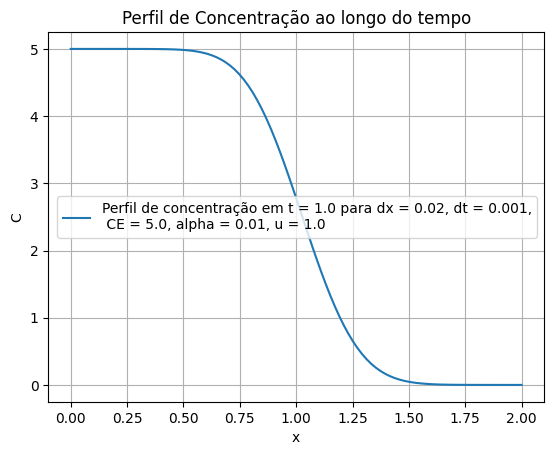

In [122]:
# Plotando o resultado
plt.plot(x, C[-1, :], label=f'Perfil de concentração em t = {T} para dx = {Lx / (Nx)}, dt = {T / Nt},\n CE = {CE}, alpha = {alpha}, u = {u}')
plt.xlabel('x')
plt.ylabel('C')
plt.grid()
titulo = 'Perfil de Concentração ao longo do tempo'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')

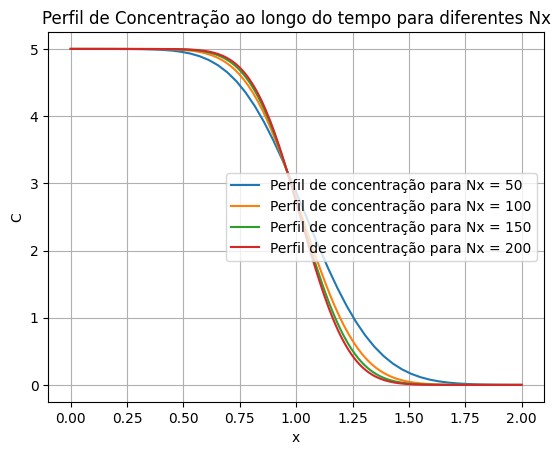

In [119]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 1.0   # tempo total de simulação
alpha = 0.01
u = 1.0
CE = 5.0

# Parâmetros de discretização
Nx = 50  # número de pontos no espaço
Nt = 1000  # número de pontos no tempo

C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nx = {Nx}')

# Parâmetros de discretização
Nx = 100  # número de pontos no espaço
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nx = {Nx}')

# Parâmetros de discretização
Nx = 150  # número de pontos no espaço
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nx = {Nx}')

# Parâmetros de discretização
Nx = 200  # número de pontos no espaço
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nx = {Nx}')

# Plotando o resultado
plt.xlabel('x')
plt.ylabel('C')
plt.grid()
titulo = 'Perfil de Concentração ao longo do tempo para diferentes Nx'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')

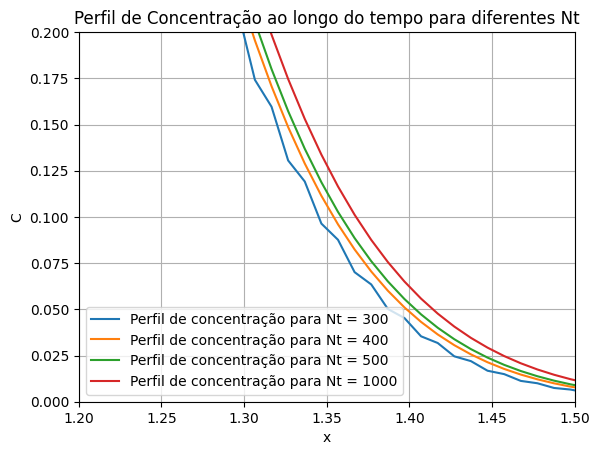

In [118]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 1.0   # tempo total de simulação
alpha = 0.01
u = 1.0
CE = 5.0

# Parâmetros de discretização
Nx = 200  # número de pontos no espaço
Nt = 300  # número de pontos no tempo

C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nt = {Nt}')

# Parâmetros de discretização
Nt = 400 # número de pontos no tempo
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nt = {Nt}')

# Parâmetros de discretização
Nt = 500  # número de pontos no tempo
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nt = {Nt}')

# Parâmetros de discretização
Nt = 1000  # número de pontos no tempo
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nt = {Nt}')

# Plotando o resultado
plt.xlabel('x')
plt.ylabel('C')
plt.grid()
titulo = 'Perfil de Concentração ao longo do tempo para diferentes Nt'
plt.title(titulo)
plt.axis([1.2, 1.5, 0, 0.2])
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')